# importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Processing

In [131]:
# loading the csv data to a Pandas DataFrame
data=pd.read_csv("C:\\Users\\20212\\OneDrive\\Desktop\\Heart Attack.csv")
# print first 5 rows of the dataset
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [127]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
# number of rows and columns in the dataset
data.shape

(1319, 9)

In [7]:
# checking for missing values
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [8]:
# statistical measures about the data
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [9]:
#check if there is any duplicated data
data.duplicated().sum()

0

# Data preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
data['class']=encoder.fit_transform(data['class'])

In [72]:
data.head(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
7,63,1,60,214,82,87.0,300.00,2.370,1
8,44,0,60,154,81,135.0,2.35,0.004,0
9,67,1,61,160,95,100.0,2.84,0.011,0


# Corellation

In [12]:
correlation=data.corr()

<Axes: >

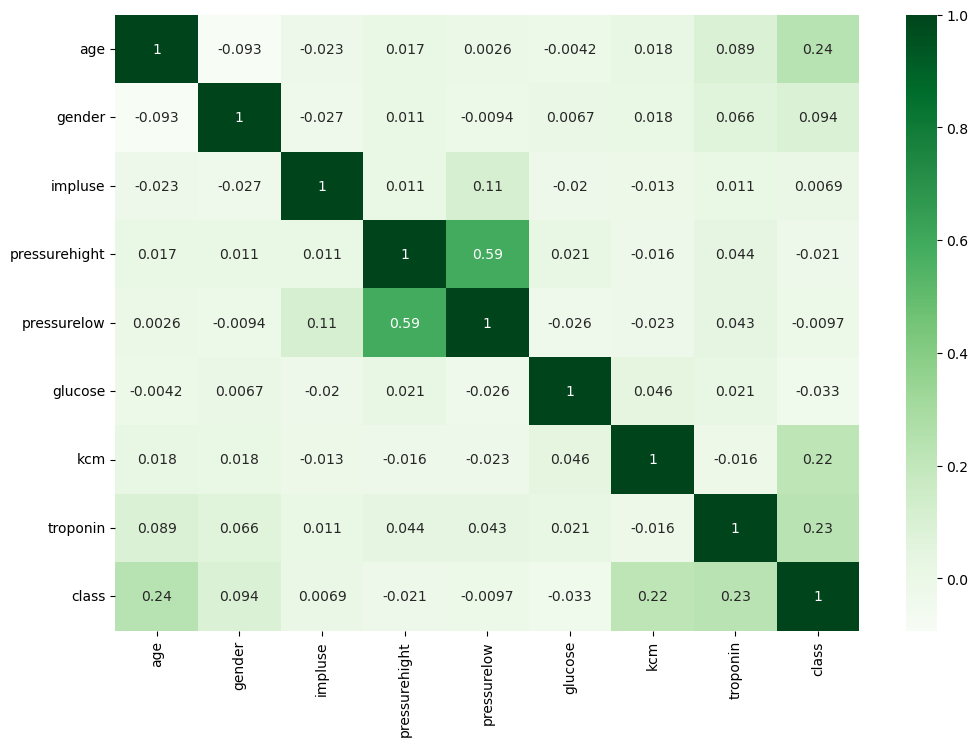

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation ,annot=True ,cbar=True ,cmap='Greens')

# Data Analysis

,class,count
0,1,810
1,0,509


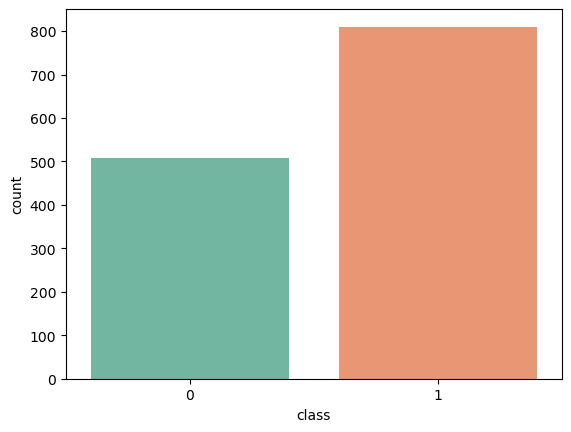

In [14]:
sns.countplot(data=data,x='class',palette='Set2')
data['class'].value_counts().reset_index(name='count')

# Spliting data

In [15]:
X = data.drop(["class"] , axis = 1)
y = data["class"].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , y_train ,y_test = train_test_split(X,y , test_size= 0.2 , random_state= 42)

In [18]:
X.shape,X_train.shape, X_test.shape,y.shape, y_train.shape, y_test.shape

((1319, 8), (1055, 8), (264, 8), (1319,), (1055,), (264,))

# Random Forest & Grid search

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = [10, 50, 100, 250, 500]

# Maximum number of levels in tree
max_depth = [None, 2,  4, 6, 8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
param_grid  = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf
               }
print(param_grid)

{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 50, 100, 250, 500], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4]}


In [74]:
#rf = RandomForestClassifier()
rf_random = GridSearchCV(RandomForestClassifier(), param_grid )
rf_random.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 50, 100, 250, 500]})

In [75]:
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [76]:
randomforestmodel=RandomForestClassifier(n_estimators= 50,
 min_samples_leaf = 1,
 max_depth= None,
 criterion='entropy')

In [84]:
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [85]:
y_pred_rf=randomforestmodel.predict(X_test)

In [86]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)


In [87]:
rf_accuracy

0.9810606060606061

# DECISION TREE MODEL

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
            'min_samples_leaf':range(1,5)}

In [30]:
#DecisionTreemodel=DecisionTreeClassifier()
clf = GridSearchCV(DecisionTreeClassifier(), tree_para)

In [31]:
#DecisionTreemodel=DecisionTreeClassifier()
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': range(1, 5)})

In [32]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [33]:
decision_tree_model=DecisionTreeClassifier(criterion='gini',
  max_depth= 4,
  min_samples_leaf= 2)

In [34]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [35]:
y_pred_dt=decision_tree_model.predict(X_test)

In [36]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.9772727272727273

# KNN Model

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
my_params={'n_neighbors':[3,5,7,9,1],
         'p':[1,2,3]}

In [112]:
knn=KNeighborsClassifier()
knngrid=GridSearchCV(knn,my_params,cv=5).fit(X_train,y_train)

In [113]:
knngrid.best_params_

{'n_neighbors': 9, 'p': 2}

In [114]:
knn_model=KNeighborsClassifier(n_neighbors = 9, p=2)
knn_model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.625

# system evaluation

# 1. randomforest Model 

In [116]:
input_data = (44,0,60,154,81,135.0,2.35,0.004)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = randomforestmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\20212\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 2. DECISION TREE MODEL

In [123]:
input_data = (63,1,60,214,82,87.0,300.00,2.370)

# change the input data to a numpy array
input_data_as_numpy_array_dt= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped_dt = input_data_as_numpy_array_dt.reshape(1,-1)

prediction_dt = decision_tree_model.predict(input_data_reshaped_dt)
print(prediction_dt)

if (prediction_dt[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\20212\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 3. KNN Model

In [121]:
input_data = (63,1,60,214,82,87.0,300.00,2.370)

# Change the input data to a numpy array
input_data_as_numpy_array_knn = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped_knn = input_data_as_numpy_array_knn.reshape(1, -1)

prediction_knn = knn_model.predict(input_data_reshaped_knn)
print(prediction_knn)

if prediction_knn[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\20212\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
